In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import vice

import sys
sys.path.append("../..")

In [19]:
import surp.analysis_scripts.rc_params
import surp.analysis_scripts.gas_phase_data as gap
import surp.analysis_scripts.plotting_utils as pluto
import surp.analysis_scripts.apogee_analysis as aah
from surp .analysis_scripts.vice_model import vice_model

/home/daniel/surp/data_analysis/../c_isotopic_yields.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  c12 = df.pivot("Mass", "Metallicity", col)


In [20]:
berg19 = pd.read_csv("../data/berg19.csv")

In [21]:
berg19 = berg19.iloc[:-1]

In [22]:
cooke17 = pd.read_csv("../data/cooke17.csv")

In [32]:
esteban09 = pd.read_csv("../data/esteban09.csv", sep="\t+")

/tmp/ipykernel_4500/3213320456.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  esteban09 = pd.read_csv("../data/esteban09.csv", sep="\t+")


In [41]:
esteban09["[c/o]"] = aah.log_to_bracket(esteban09.eps_c - esteban09.eps_o,
                                       "c", "o")
esteban09["[o/h]"] = aah.log_to_bracket(esteban09.eps_o, "o") - 12
esteban09["[c/o]_err"] = esteban09.eps_c_err + esteban09.eps_o_err
esteban09["[o/h]_err"] = esteban09.eps_o_err 

<ErrorbarContainer object of 3 artists>

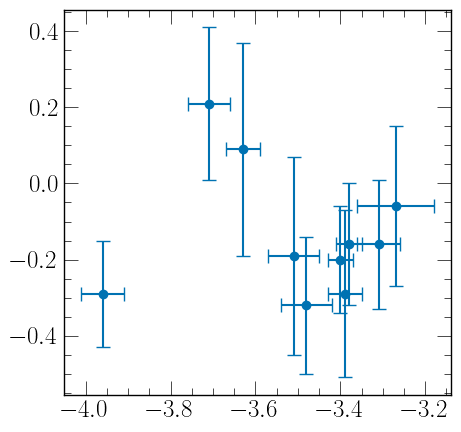

In [34]:
plt.errorbar(esteban09.eps_o - 12, esteban09.eps_c - esteban09.eps_o,
            xerr=esteban09.eps_o_err, yerr=esteban09.eps_o_err + esteban09.eps_c_err,
            fmt="o")

Text(0, 0.5, 'log C/O')

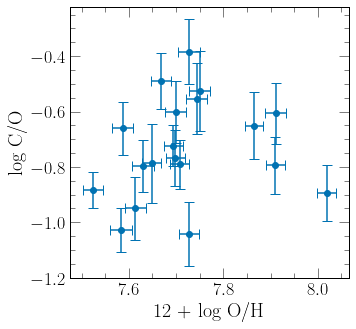

In [30]:
plt.errorbar(berg19.eps_o, berg19.log_c_o, xerr=berg19.eps_o_err, yerr=berg19.log_c_o_err, fmt="o")
plt.xlabel("12 + log O/H")
plt.ylabel("log C/O")

<ErrorbarContainer object of 3 artists>

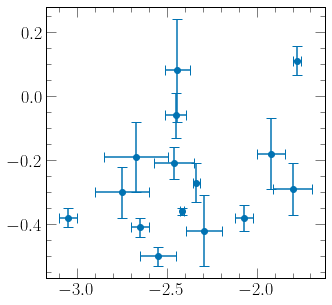

In [58]:
plt.errorbar(cooke17.o_h, cooke17.c_o, xerr=cooke17.o_h_err, yerr=cooke17.c_o_err, fmt="o")

In [38]:
berg19["[c/o]"] = berg19.log_c_o + np.log10(12/16) - np.log10(vice.solar_z("c")/vice.solar_z("o"))
berg19["[o/h]"] = berg19.eps_o + np.log10(16) - np.log10(vice.solar_z("o")) - 12

In [39]:
fiducial = vice_model("../output/cristallo11_f0.2_Z0.4_eta1.0_v0.1.3_lateburst.json")

FileNotFoundError: [Errno 2] No such file or directory: '../output/cristallo11_f0.2_Z0.4_eta1.0_v0.1.3_lateburst.json'

/home/daniel/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


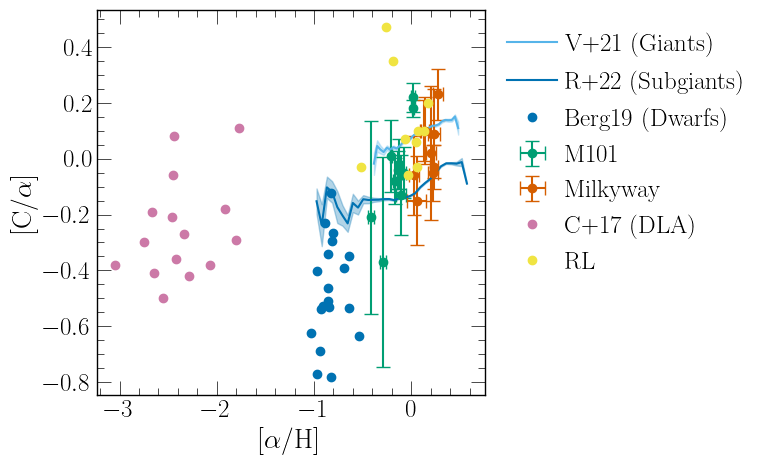

In [44]:
plt.errorbar(berg19["[o/h]"], berg19["[c/o]"], #xerr=berg19.eps_o_err, yerr=berg19.log_c_o_err,
             fmt="o", label="Berg19 (Dwarfs)")

# fiducial.plot_gas("[o/h]", "[c/o]", label="Model")
gap.plot_all("[o/h]", "[c/o]")

plt.errorbar(cooke17.o_h, cooke17.c_o, #xerr=cooke17.o_h_err, yerr=cooke17.c_o_err, 
             fmt="o", label="C+17 (DLA)")
plt.errorbar(esteban09["[o/h]"], esteban09["[c/o]"], #xerr=esteban09["[o/h]_err"], yerr=esteban09["[c/o]_err"],
            fmt="o", label="RL")

df = aah.vincenzo2021()
pluto.plot_mean_track(df["[o/h]"], df["[c/o]"], xlim=(-0.4, 0.6), label="V+21 (Giants)", shade_width=True, err_mean=True)

subgiants = aah.subgiants
filt = ~np.isnan(subgiants["C_MG"])
filt &+ ~np.isnan(subgiants["MG_H"])
df = subgiants[filt]
pluto.plot_mean_track(df["MG_H"], df["C_MG"], xlim=(-1, 0.6), label="R+22 (Subgiants)", shade_width=True, err_mean=True)


plt.xlabel(r"[$\alpha$/H]")
plt.ylabel(r"[C/$\alpha$]")
pluto.legend_outside()

Redshift: (Pettini et al. 2000;
Fosbury & Villar-Martín et al. 2003; Erb et al. 2010; Christensen
et al. 2012; Bayliss et al. 2014; James et al. 2014; Stark et al.
2014; Steidel et al. 2016; Vanzella et al. 2016; Amorín et al.
2017; Berg et al. 2018; Rigby et al. 2018)

RL: (teal squares: Esteban et al. 2002, 2009,
2014; Pilyugin & Thuan 2005; García-Rojas & Esteban 2007;
López-Sánchez et al. 2007).

CL: Senchyna et al. (2017) and Peña-Guerrero et al. (2017)

MW stars: Gustafsson et al. (1999), Akerman
et al. (2004), Fabbian et al. (2009), and Nissen et al. (2014)